#Supervised: ANN

Karena pada metode Decision Tree sebelumnya sudah dilakukan eksplorasi dan pengolahan data, pada notebook ini akan langsung menggunakan data yang sudah dibersihkan sebelumnya.

In [ ]:
# Mengambil data yang sudah clean
data_dir = "/content/drive/MyDrive/BAI/heart disease dataset/Clean_Heart_Failure_Prediction.csv"

In [ ]:
import pandas as pd

#load data
df = pd.read_csv(data_dir)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,1,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  RestingECG_Normal  918 non-null    int64  
 12  RestingECG_ST      918 non-null    int64  
 13  ExerciseAngina_Y   918 non-null    int64  
 14  ST_Slope_Flat      918 non-null    int64  
 15  ST_Slope_Up        918 non-null    int64  
dtypes: float64(5), int64(11)
m

## Data Preparation

In [ ]:
# Memisahkan feature dan label
features = [x for x in df if x not in "HeartDisease"]

#Split Dataset

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(734, 15)
(734,)
(184, 15)
(184,)


## Building ANN Model

In [ ]:
# Import Library
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix


In [ ]:
model = Sequential([
                      Flatten(input_dim=X_train.shape[1]),
                      Dense(256, activation='relu'),
                      Dense(32, activation='relu'),
                      Dropout(0.2),
                      Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 256)               4096      
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12353 (48.25 KB)
Trainable params: 12353 (48.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs = 30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
23/23 [==============================] - 2s 20ms/step - loss: 0.5643 - accuracy: 0.7834 - val_loss: 0.4405 - val_accuracy: 0.8587
Epoch 2/30
23/23 [==============================] - 0s 6ms/step - loss: 0.4121 - accuracy: 0.8433 - val_loss: 0.3405 - val_accuracy: 0.8750
Epoch 3/30
23/23 [==============================] - 0s 6ms/step - loss: 0.3760 - accuracy: 0.8501 - val_loss: 0.3173 - val_accuracy: 0.8967
Epoch 4/30
23/23 [==============================] - 0s 6ms/step - loss: 0.3655 - accuracy: 0.8488 - val_loss: 0.2954 - val_accuracy: 0.9076
Epoch 5/30
23/23 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.8583 - val_loss: 0.2939 - val_accuracy: 0.9076
Epoch 6/30
23/23 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8569 - val_loss: 0.2867 - val_accuracy: 0.9022
Epoch 7/30
23/23 [==============================] - 0s 6ms/step - loss: 0.3465 - accuracy: 0.8638 - val_loss: 0.2860 - val_accuracy: 0.9022
Epoch 8/30
23/23 [=

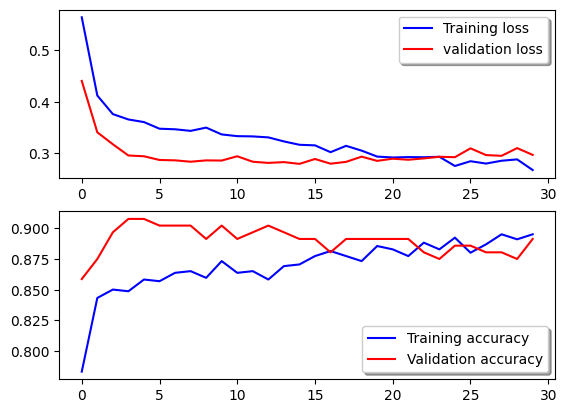

In [ ]:

fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
y_predict = model.predict(X_val)

6/6 [==============================] - 0s 5ms/step


In [ ]:
y_pred_labels = (y_predict > 0.5).astype(int)

In [ ]:
acc = accuracy_score(y_pred_labels, y_val)
print(acc)

0.8913043478260869


<Axes: >

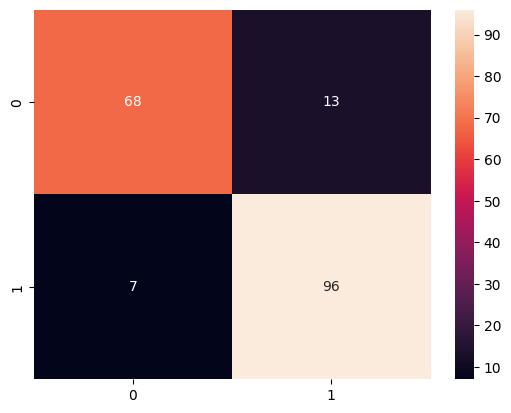

In [ ]:
ann_cm = confusion_matrix(y_val, y_pred_labels)
sns.heatmap(ann_cm,fmt='',annot=True)